In [1]:
import os
import sys
sys.path.append(os.path.abspath('..'))

In [2]:

from src.EDA.data_overview import Inspector,ViewData,TypeInspector,StatsInspector
from src.EDA.univatiate import AutoUnivariateAnalyzer
from src.EDA.bivariate import BivariateAnalyzer, CategoricalVsNumericalAnalysis, NumericalVsNumericalAnalysis

import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:

ratings = pd.read_csv(r'C:\Users\sarva\MoviePulse\data\processed\ratings_clean.csv')
movies = pd.read_csv(r'C:\Users\sarva\MoviePulse\data\processed\movies_clean.csv')

data ={'movies' : movies , 'ratings' : ratings}

In [4]:
see_data = Inspector(ViewData())
see_data.inspect(ratings)



- Shape : (100836, 4)
Sample of :
    userId  movieId  rating            timestamp
0       1        1     4.0  2000-07-30 18:45:03
1       1        3     4.0  2000-07-30 18:20:47
2       1        6     4.0  2000-07-30 18:37:04
3       1       47     5.0  2000-07-30 19:03:35
4       1       50     5.0  2000-07-30 18:48:51


In [5]:
see_data.inspect(movies)


- Shape : (9742, 5)
Sample of :
    movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                              genres  imdbId   tmdbId  
0  ['Adventure', 'Animation', 'Children', 'Comedy...  114709    862.0  
1               ['Adventure', 'Children', 'Fantasy']  113497   8844.0  
2                              ['Comedy', 'Romance']  113228  15602.0  
3                     ['Comedy', 'Drama', 'Romance']  114885  31357.0  
4                                         ['Comedy']  113041  11862.0  


In [6]:
see_data.use(TypeInspector())
see_data.inspect(movies)


Column Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   title    9742 non-null   object 
 2   genres   9742 non-null   object 
 3   imdbId   9742 non-null   int64  
 4   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 380.7+ KB


In [7]:
see_data.inspect(ratings)


Column Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 3.1+ MB


In [8]:
see_data.use(StatsInspector())
see_data.inspect(movies)


Numerical Stats:
             movieId        imdbId         tmdbId
count    9742.000000  9.742000e+03    9734.000000
mean    42200.353623  6.771839e+05   55162.123793
std     52160.494854  1.107228e+06   93653.481487
min         1.000000  4.170000e+02       2.000000
25%      3248.250000  9.518075e+04    9665.500000
50%      7300.000000  1.672605e+05   16529.000000
75%     76232.000000  8.055685e+05   44205.750000
max    193609.000000  8.391976e+06  525662.000000

Categorical Stats:
              title     genres
count          9742       9742
unique         9737        951
top     Emma (1996)  ['Drama']
freq              2       1053


In [9]:
see_data.inspect(ratings)


Numerical Stats:
              userId        movieId         rating
count  100836.000000  100836.000000  100836.000000
mean      326.127564   19435.295718       3.501557
std       182.618491   35530.987199       1.042529
min         1.000000       1.000000       0.500000
25%       177.000000    1199.000000       3.000000
50%       325.000000    2991.000000       3.500000
75%       477.000000    8122.000000       4.000000
max       610.000000  193609.000000       5.000000

Categorical Stats:
                  timestamp
count                100836
unique                85043
top     2016-04-04 16:39:58
freq                    128


In [10]:
print(f"Missing Values in Movies: " , movies.isna().sum())
print(f"Missing Values in Ratings: " , ratings.isna().sum())

Missing Values in Movies:  movieId    0
title      0
genres     0
imdbId     0
tmdbId     8
dtype: int64
Missing Values in Ratings:  userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [11]:
print(f"Duplicate values in movies: " , movies.duplicated().sum())
print(f"Duplicate values in ratings: " , ratings.duplicated().sum())

Duplicate values in movies:  0
Duplicate values in ratings:  0


### Analyse Genres columns

In [12]:
import ast

movies['genres'] = movies['genres'].apply(ast.literal_eval)


In [13]:
genres_exploded = movies.explode('genres')
genres_exploded

,movieId,title,genres,imdbId,tmdbId
0,1,Toy Story (1995),Adventure,114709,862.0
0,1,Toy Story (1995),Animation,114709,862.0
0,1,Toy Story (1995),Children,114709,862.0
0,1,Toy Story (1995),Comedy,114709,862.0
0,1,Toy Story (1995),Fantasy,114709,862.0
...,...,...,...,...,...
9738,193583,No Game No Life: Zero (2017),Fantasy,5914996,445030.0
9739,193585,Flint (2017),Drama,6397426,479308.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action,8391976,483455.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Animation,8391976,483455.0


In [14]:
genres_count = genres_exploded['genres'].value_counts().reset_index()
genres_count.columns = ['genre' , 'Number of Movies']
print(genres_count)

                 genre  Number of Movies
0                Drama              4361
1               Comedy              3756
2             Thriller              1894
3               Action              1828
4              Romance              1596
5            Adventure              1263
6                Crime              1199
7               Sci-Fi               980
8               Horror               978
9              Fantasy               779
10            Children               664
11           Animation               611
12             Mystery               573
13         Documentary               440
14                 War               382
15             Musical               334
16             Western               167
17                IMAX               158
18           Film-Noir                87
19  (no genres listed)                34


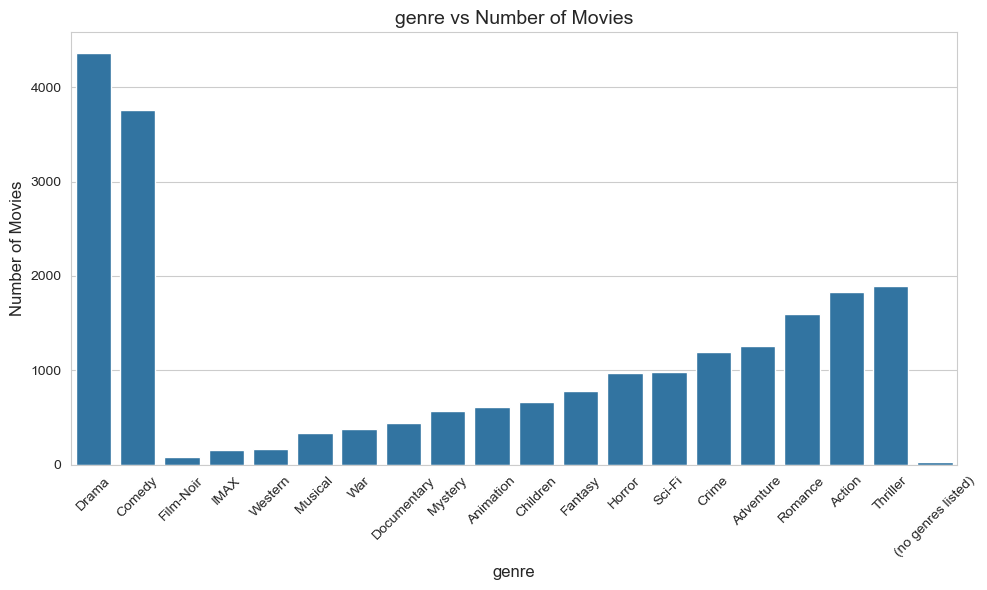

In [15]:
bivariate = BivariateAnalyzer(CategoricalVsNumericalAnalysis())
bivariate.execute_analysis(genres_count, 'genre' , 'Number of Movies' , plot_type='bar')

The most number of movies are made in the genre of  Drama and Comedy followed by Triller, Action and Romance

### Average Rating By Genre

In [16]:
rating_genre = pd.merge(ratings, genres_exploded[['movieId' , 'genres']] , on='movieId')

avg_ratings_per_genre = rating_genre.groupby('genres')['rating'].mean().sort_values(ascending=False).reset_index()
avg_ratings_per_genre.columns = ['Genre', 'Average Rating']
print(avg_ratings_per_genre)

                 Genre  Average Rating
0            Film-Noir        3.920115
1                  War        3.808294
2          Documentary        3.797785
3                Crime        3.658294
4                Drama        3.656184
5              Mystery        3.632460
6            Animation        3.629937
7                 IMAX        3.618335
8              Western        3.583938
9              Musical        3.563678
10           Adventure        3.508609
11             Romance        3.506511
12            Thriller        3.493706
13             Fantasy        3.491001
14  (no genres listed)        3.489362
15              Sci-Fi        3.455721
16              Action        3.447984
17            Children        3.412956
18              Comedy        3.384721
19              Horror        3.258195


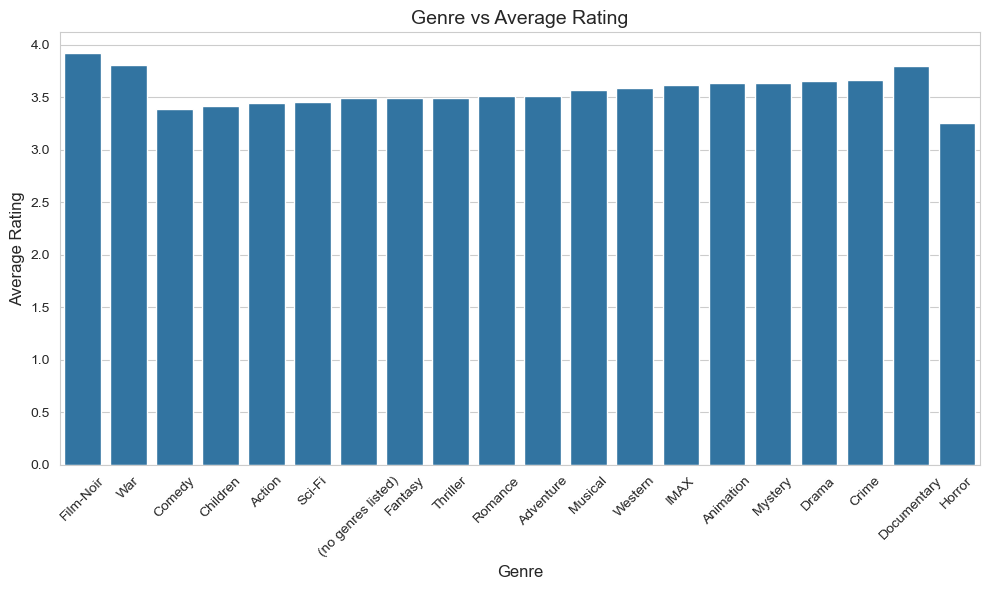

In [17]:
bivariate.execute_analysis(avg_ratings_per_genre, 'Genre','Average Rating', plot_type='bar')

In Above graph average rating of Film-Noir is high but the movies made in the genre of Film-Nair is also very less and most of the genres have same rating in the range between 3.3 to 4  


Descriptive Statistics for Numerical Feature: rating
count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64


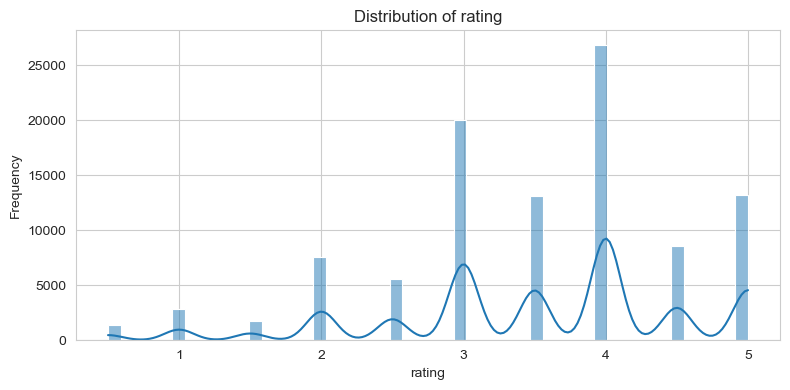

In [18]:
uni=AutoUnivariateAnalyzer()
uni.analyze(ratings , 'rating')

The tallest bars are at ratings like 4.0, 3.0, 5.0, which means users often rate movies with round numbers.

Rating 4.0 is the most common:

Over 25,000+ ratings are at 4.0, making it the peak rating.

Rating 3.0 is the second most common, followed by 5.0 and 2.0.

The KDE line has many peaks, which is a bit unusual — it shows many local maxima, possibly because of repeated values and not a smooth continuous distribution.

In [19]:
print("Unique ratings : "  , ratings['rating'].nunique())
print("Rating value counts : " , ratings['rating'].value_counts().sort_index())
print("Basic Statistics : " ,ratings['rating'].describe() )

Unique ratings :  10
Rating value counts :  rating
0.5     1370
1.0     2811
1.5     1791
2.0     7551
2.5     5550
3.0    20047
3.5    13136
4.0    26818
4.5     8551
5.0    13211
Name: count, dtype: int64
Basic Statistics :  count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64


### Average Rating Per Movies

In [20]:
movie_avg=ratings.groupby('movieId')['rating'].mean().reset_index()
movie_avg.columns = ['movieId' , 'avg_rating']
movie_avg.sort_values('avg_rating', ascending=False)
movie_avg = movie_avg.merge(movies[['movieId' , 'title']] , on= 'movieId')
movie_avg.head()

,movieId,avg_rating,title
0,1,3.920930,Toy Story (1995)
1,2,3.431818,Jumanji (1995)
2,3,3.259615,Grumpier Old Men (1995)
3,4,2.357143,Waiting to Exhale (1995)
4,5,3.071429,Father of the Bride Part II (1995)


In [23]:

rating_counts = ratings.groupby('movieId')['rating'].count().reset_index()
rating_counts.columns = ['movieId', 'num_ratings']


movie_stats = movie_avg.merge(rating_counts, on='movieId')
popular_movies = movie_stats[movie_stats['num_ratings'] >= 50]

top_movies = popular_movies.sort_values(by='avg_rating' , ascending= False).head(10)
top_movies


,movieId,avg_rating,title,num_ratings
277,318,4.429022,"Shawshank Redemption, The (1994)",317
659,858,4.289062,"Godfather, The (1972)",192
2224,2959,4.272936,Fight Club (1999),218
974,1276,4.271930,Cool Hand Luke (1967),57
602,750,4.268041,Dr. Strangelove or: How I Learned to Stop Worr...,97
686,904,4.261905,Rear Window (1954),84
921,1221,4.259690,"Godfather: Part II, The (1974)",129
6298,48516,4.252336,"Departed, The (2006)",107
913,1213,4.250000,Goodfellas (1990),126
694,912,4.240000,Casablanca (1942),100


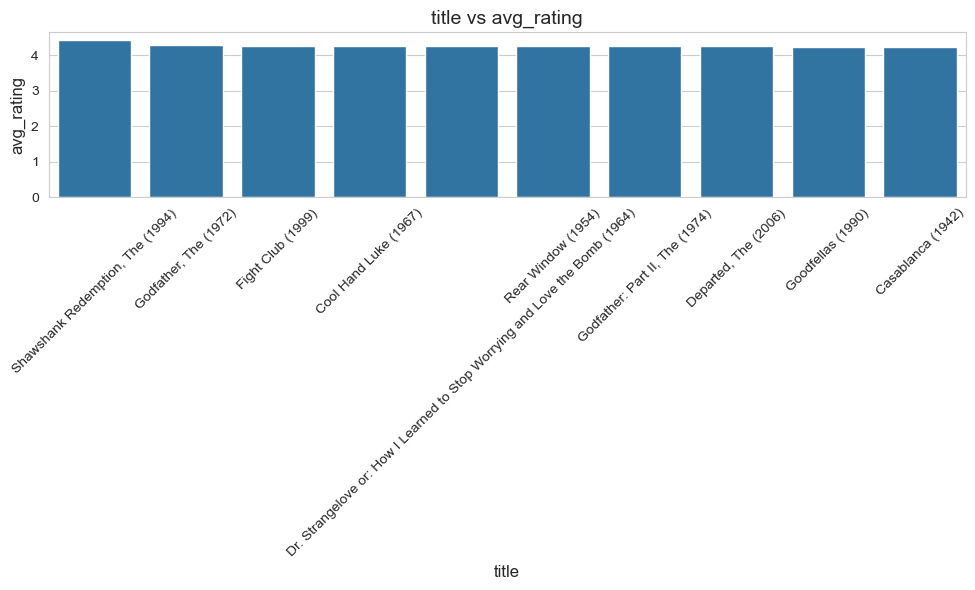

In [24]:
bivariate.execute_analysis(top_movies , 'title', 'avg_rating'  , plot_type='bar')

In [25]:
top_movies

,movieId,avg_rating,title,num_ratings
277,318,4.429022,"Shawshank Redemption, The (1994)",317
659,858,4.289062,"Godfather, The (1972)",192
2224,2959,4.272936,Fight Club (1999),218
974,1276,4.271930,Cool Hand Luke (1967),57
602,750,4.268041,Dr. Strangelove or: How I Learned to Stop Worr...,97
686,904,4.261905,Rear Window (1954),84
921,1221,4.259690,"Godfather: Part II, The (1974)",129
6298,48516,4.252336,"Departed, The (2006)",107
913,1213,4.250000,Goodfellas (1990),126
694,912,4.240000,Casablanca (1942),100


The Above Graph Shows top 10 movies according to there ratings:<br>
1).Shawshank Redemption, The (1994)<br>
2).Godfather, The (1972)<br>
3).Fight Club (1999)	<br>
4).Cool Hand Luke (1967)	<br>
5).Dr. Strangelove or: How I Learned to Stop Worrying and love the bomb<br>
6).Rear Window (1954)	<br>
7).Godfather: Part II, The (1974)<br>
8).Departed, The (2006)<br>
9).Goodfellas (1990)<br>
10).Casablanca (1942)



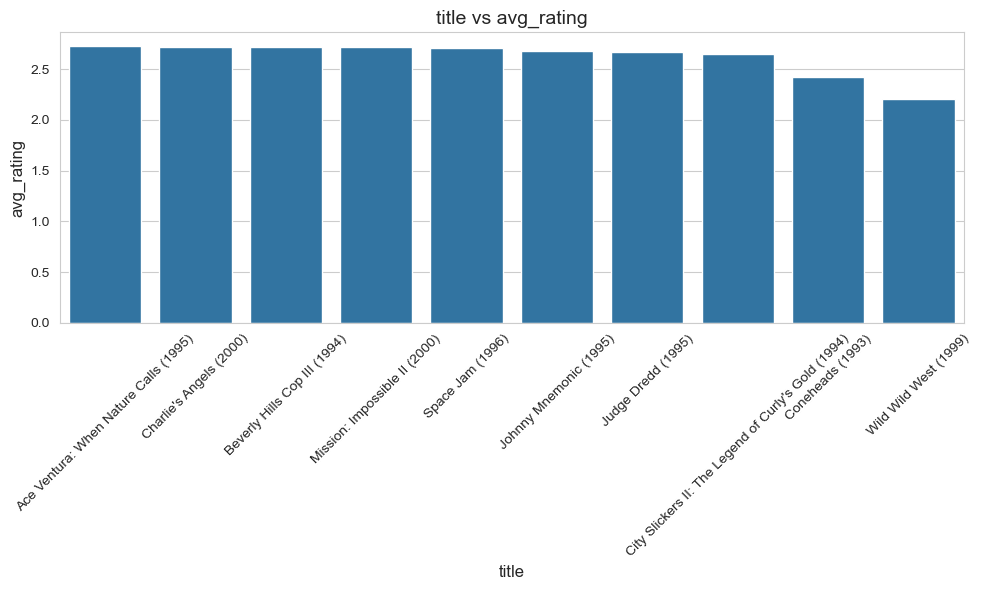

In [26]:
worst_movies = popular_movies.sort_values(by='avg_rating' , ascending= False).tail(10)
bivariate.execute_analysis(worst_movies, 'title' , 'avg_rating', plot_type = 'bar')


### User Average Rating

In [27]:
user_avg = ratings.groupby('userId')['rating'].mean().reset_index()
user_avg.columns = ['userId' , 'avg_rating']


Descriptive Statistics for Numerical Feature: avg_rating
count    610.000000
mean       3.657222
std        0.480635
min        1.275000
25%        3.360000
50%        3.694385
75%        3.997500
max        5.000000
Name: avg_rating, dtype: float64


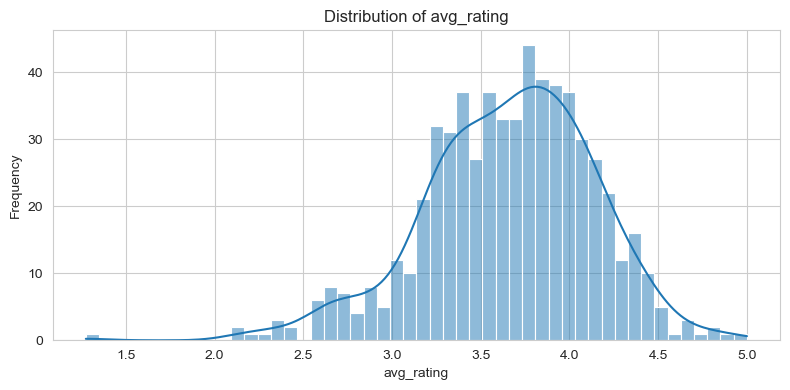

In [28]:
uni.analyze(user_avg , 'avg_rating')

The User Reviews are distributed through 0.5 to 5.0 that means the user are not generous user is giving harsh review as well